Import modules

In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd

The `calculate_mean_variance` function analyzes a collection of images in a specified folder to compute the mean and variance for each color channel (Red, Green, and Blue - RGB) across all images.

In [2]:
def calculate_mean_variance(images_folder):
    # Get a list of image file names in the specified folder
    image_files = [f for f in os.listdir(images_folder) if os.path.isfile(os.path.join(images_folder, f))]

    # Initialize dictionaries to store mean and variance values for each color channel
    mean_values = {'R': [], 'G': [], 'B': []}
    variance_values = {'R': [], 'G': [], 'B': []}

    for img_file in image_files:
        # Read each image
        img = cv2.imread(os.path.join(images_folder, img_file))

        # Split image into color channels (BGR format)
        b, g, r = cv2.split(img)

        # Calculate mean and variance for each color channel
        for channel, channel_name in zip((r, g, b), ('R', 'G', 'B')):
            mean = np.mean(channel)
            variance = np.var(channel)
            
            # Append mean and variance to respective lists
            mean_values[channel_name].append(mean)
            variance_values[channel_name].append(variance)

    # Calculate overall mean and variance across all images for each channel
    overall_mean = {channel: np.mean(values) for channel, values in mean_values.items()}
    overall_variance = {channel: np.mean(values) for channel, values in variance_values.items()}

    return overall_mean, overall_variance

Glioma mean and variance

In [3]:
means_glioma, variances_glioma = calculate_mean_variance('../data/Training/glioma')
print("Mean values for each channel (R, G, B):", means_glioma)
print("Variance values for each channel (R, G, B):", variances_glioma)

Mean values for each channel (R, G, B): {'R': 32.71142956995766, 'G': 32.71142956995766, 'B': 32.71142956995766}
Variance values for each channel (R, G, B): {'R': 1502.451385575819, 'G': 1502.451385575819, 'B': 1502.451385575819}


Meningioma mean and variance

In [4]:
means_meninglioma, variances_meninglioma = calculate_mean_variance('../data/Training/meningioma')
print("Mean values for each channel (R, G, B):", means_meninglioma)
print("Variance values for each channel (R, G, B):", variances_meninglioma)

Mean values for each channel (R, G, B): {'R': 43.482108182601415, 'G': 43.482108182601415, 'B': 43.482108182601415}
Variance values for each channel (R, G, B): {'R': 2246.2396245212185, 'G': 2246.2396245212185, 'B': 2246.2396245212185}


Pituitary mean and variance

In [5]:
means_pituitary, variances_pituitary = calculate_mean_variance('../data/Training/pituitary')
print("Mean values for each channel (R, G, B):", means_pituitary)
print("Variance values for each channel (R, G, B):", variances_pituitary)
     

Mean values for each channel (R, G, B): {'R': 49.26789291589136, 'G': 49.26789291589136, 'B': 49.26789291589136}
Variance values for each channel (R, G, B): {'R': 1737.0614408600184, 'G': 1737.0614408600184, 'B': 1737.0614408600184}


Notumor mean and variance

In [6]:
means_notumor, variances_notumor = calculate_mean_variance('../data/Training/notumor')
print("Mean values for each channel (R, G, B):", means_notumor)
print("Variance values for each channel (R, G, B):", variances_notumor)

Mean values for each channel (R, G, B): {'R': 60.718336203137255, 'G': 60.7213384444663, 'B': 60.76132097256693}
Variance values for each channel (R, G, B): {'R': 3925.5069140957066, 'G': 3925.5333829203105, 'B': 3927.142774506975}


Create dfs

In [11]:

def plot_mean_and_variance(mean_values, variance_values, title):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

    # Plot mean values
    axes[0].bar(mean_values.keys(), mean_values.values(), color=['red', 'green', 'blue'])
    axes[0].set_title('Mean Values')
    axes[0].set_xlabel('Channels')
    axes[0].set_ylabel('Mean')

    # Plot variance values
    axes[1].bar(variance_values.keys(), variance_values.values(), color=['red', 'green', 'blue'])
    axes[1].set_title('Variance Values')
    axes[1].set_xlabel('Channels')
    axes[1].set_ylabel('Variance')

    # Set the overall title for the entire subplot
    plt.suptitle(title)

    # Adjust layout for better spacing
    plt.tight_layout()


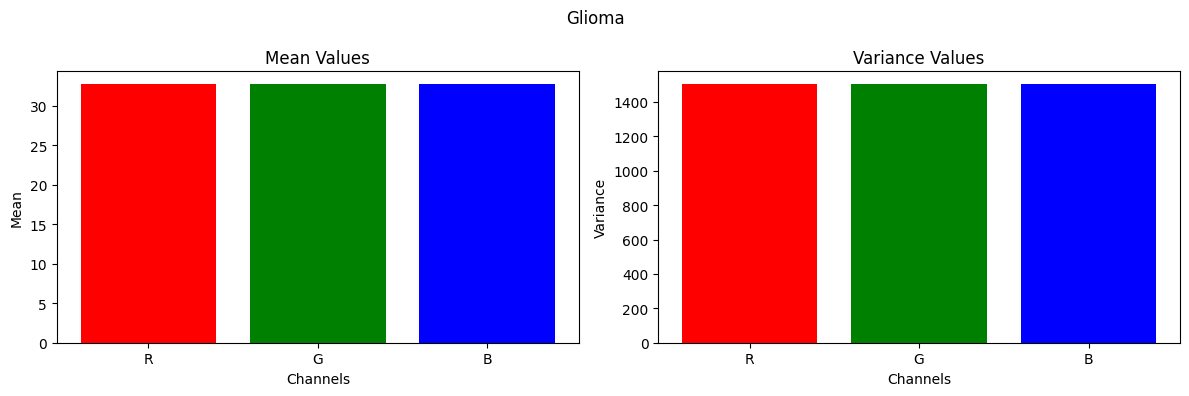

In [12]:
plot_mean_and_variance(means_glioma, variances_glioma, title='Glioma')

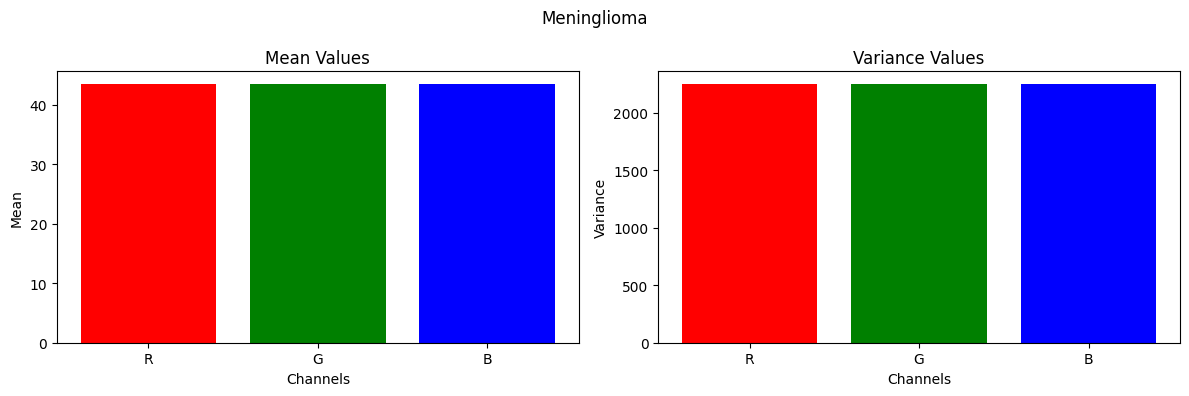

In [13]:
plot_mean_and_variance(means_meninglioma, variances_meninglioma, title='Meninglioma')

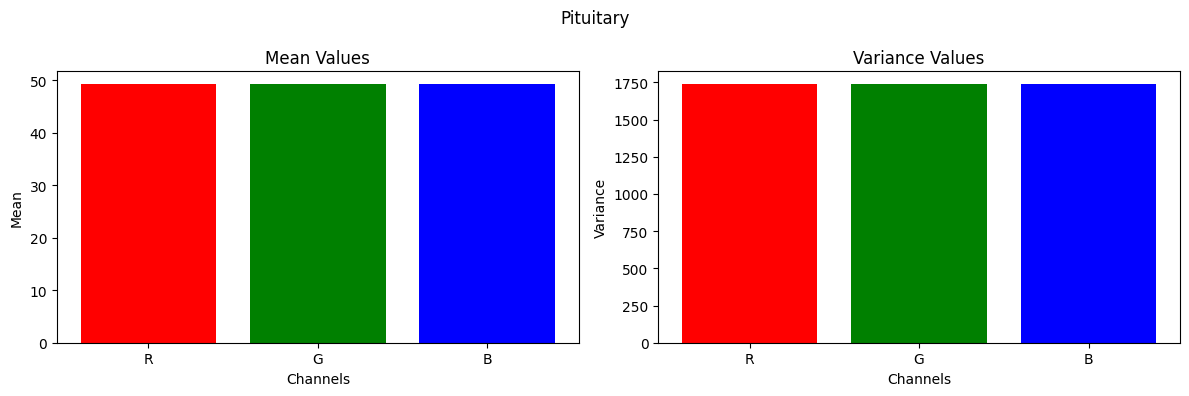

In [14]:
plot_mean_and_variance(means_pituitary, variances_pituitary, title='Pituitary')

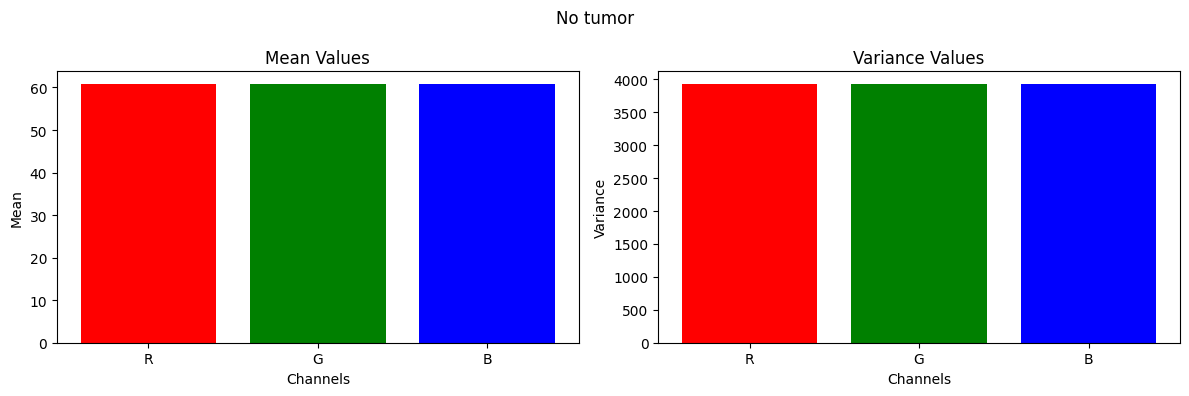

In [15]:
plot_mean_and_variance(means_notumor, variances_notumor, title='No tumor')